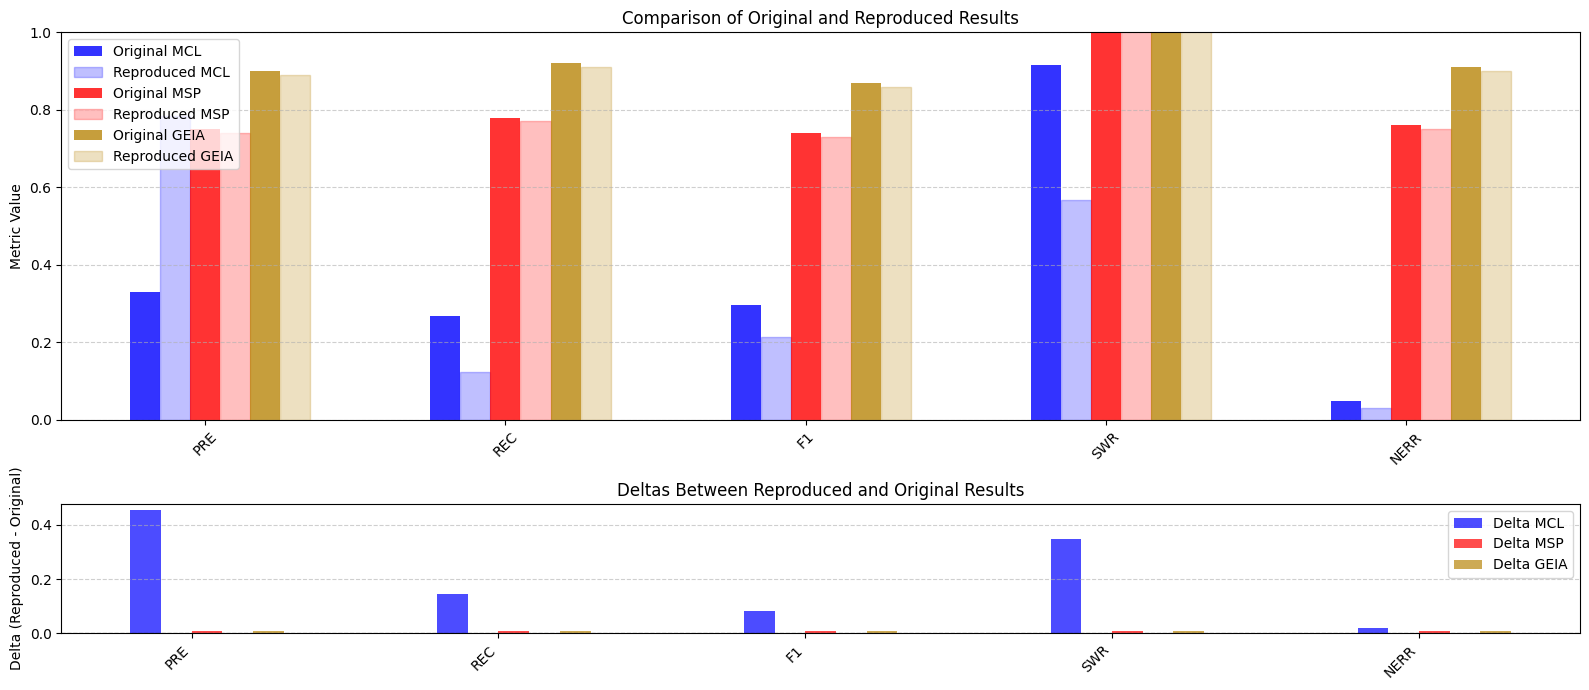

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace these with your actual data)
metrics = ["PRE", "REC", "F1", "SWR", "NERR"]
original = {
    "MCL": [0.33, 0.2679,  0.2974, 0.5274+ 0.388, 0.05],
    "MSP": [0.75, 0.78, 0.74, 0.5274+ 0.73, 0.76],
    "GEIA": [0.9, 0.92, 0.87, 0.5274+  0.89, 0.91]
}
reproduced = {
    "MCL": [0.7838, 0.1238,  0.2138, 0.5274+ 0.04, 0.03],
    "MSP": [0.74, 0.77,  0.73, 0.5274+  0.72, 0.75],
    "GEIA": [0.89, 0.91, 0.86, 0.5274+ 0.88, 0.90]
}

# Calculate deltas
deltas = {model: abs(np.array(reproduced[model]) - np.array(original[model])) for model in original.keys()}

# Set up plot
x = np.arange(len(metrics))  # Metrics on x-axis
width = 0.1  # Width of bars

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 7), gridspec_kw={"height_ratios": [3, 1]})

# Colors for each attacker model
colors = {"MCL": "blue", "MSP": "red", "GEIA": "darkgoldenrod"}

# Top plot: Original vs Reproduced
for i, model in enumerate(original.keys()):
    ax1.bar(x + (2 * i - 2) * width, original[model], width, label=f"Original {model}", color=colors[model], alpha=0.8)
    ax1.bar(x + (2 * i - 1) * width, reproduced[model], width, label=f"Reproduced {model}",
            edgecolor=colors[model], color=colors[model], alpha=0.25) # facecolor="none", linewidth=1.5)

ax1.set_xticks(x)
ax1.set_xticklabels(metrics, rotation=45, ha="center")
ax1.set_ylabel("Metric Value")
ax1.set_title("Comparison of Original and Reproduced Results")
ax1.legend()
ax1.set_ylim(top=1)
ax1.grid(axis="y", linestyle="--", alpha=0.6)

# Bottom plot: Deltas
for i, model in enumerate(deltas.keys()):
    ax2.bar(x + (2 * i - 1.5) * width, deltas[model], width, color=colors[model], alpha=0.7, label=f"Delta {model}")

ax2.set_xticks(x)
ax2.set_xticklabels(metrics, rotation=45, ha="right")
ax2.set_ylabel("Delta (Reproduced - Original)")
ax2.axhline(0, color="black", linewidth=0.8, linestyle="--")
ax2.set_title("Deltas Between Reproduced and Original Results")
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()